In [16]:
import pandas as pd # for reading file 
import numpy as np
import matplotlib.pyplot as plt #used for plotting
%matplotlib inline
import seaborn as sns # for better plotting 

In [3]:
df = pd.read_csv('Indian automoble buying behavour study 1.0.csv')

In [4]:
df.head()# data consists of objects too ltes check further
#removing unwanted  coloumns such as make

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Unnamed: 13,Unnamed: 14
0,27,Salaried,Single,Post Graduate,0,1,0,0,800000,0,800000,i20,800000,NaN,NaN
1,35,Salaried,Married,Post Graduate,2,1,0,1,1400000,600000,2000000,Ciaz,1000000,NaN,NaN
2,45,Business,Married,Graduate,4,1,1,0,1800000,0,1800000,Duster,1200000,NaN,NaN
3,41,Business,Married,Post Graduate,3,0,0,1,1600000,600000,2200000,City,1200000,NaN,NaN
4,31,Salaried,Married,Post Graduate,2,1,1,1,1800000,800000,2600000,SUV,1600000,NaN,NaN


In [10]:
df.drop(['Make'],axis =1 ,inplace =True)

In [11]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,1,0,0,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,1,0,1,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,1,1,0,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,0,0,1,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,1,1,1,1800000,800000,2600000,1600000


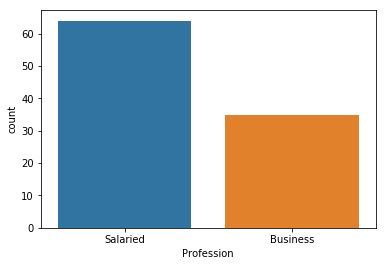

In [18]:
#EDA
plt.figure()
sns.countplot(df['Profession'])

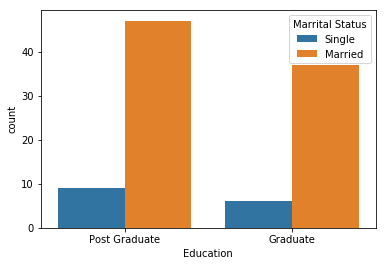

In [25]:
plt.figure()
sns.countplot(x ='Education',hue ='Marrital Status',data = df )

In [26]:
df.isnull().sum() # checking for any missing value

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Price               0
dtype: int64

In [27]:
#convering variables into categorical 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
Age                 99 non-null int64
Profession          99 non-null object
Marrital Status     99 non-null object
Education           99 non-null object
No of Dependents    99 non-null int64
Personal loan       99 non-null int64
House Loan          99 non-null int64
Wife Working        99 non-null int64
Salary              99 non-null int64
Wife Salary         99 non-null int64
Total Salary        99 non-null int64
Price               99 non-null int64
dtypes: int64(9), object(3)
memory usage: 9.4+ KB


In [29]:
marital = pd.get_dummies(df['Marrital Status'],drop_first = True)
Profession= pd.get_dummies(df['Profession'],drop_first = True)
education = pd.get_dummies(df['Education'],drop_first = True)  


In [31]:
df.drop(['Marrital Status','Profession','Education'],axis = 1,inplace = True)

In [32]:
df.head()

,Age,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,0,1,0,0,800000,0,800000,800000
1,35,2,1,0,1,1400000,600000,2000000,1000000
2,45,4,1,1,0,1800000,0,1800000,1200000
3,41,3,0,0,1,1600000,600000,2200000,1200000
4,31,2,1,1,1,1800000,800000,2600000,1600000


In [33]:
df_new = pd.concat([df,marital,Profession,education],axis = 1)

In [34]:
df_new.head()

,Age,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Single,Salaried,Post Graduate
0,27,0,1,0,0,800000,0,800000,800000,1,1,1
1,35,2,1,0,1,1400000,600000,2000000,1000000,0,1,1
2,45,4,1,1,0,1800000,0,1800000,1200000,0,0,0
3,41,3,0,0,1,1600000,600000,2200000,1200000,0,0,1
4,31,2,1,1,1,1800000,800000,2600000,1600000,0,1,1


In [48]:
#logistic regression model implimentation
#step split the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_new.drop('Personal loan',axis = 1),
                                                 df_new['Personal loan'],test_size = 0.30,
                                                 random_state = 101)


In [38]:
from sklearn.linear_model import LogisticRegression

In [40]:
lm = LogisticRegression()

In [49]:
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
predict = lm.predict(x_test)

In [51]:
predict

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
#evalution
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.85      0.96      0.90        23
          1       0.75      0.43      0.55         7

avg / total       0.82      0.83      0.82        30

